Hello, my name is Margarita Iankova. I'm going to review your project!

You can find my comments in <span style="color:green">green</span>,<span style="color:blue">blue</span> or <span style="color:red">red</span> boxes like this:

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
<b>Remarks:</b> if I can give some recommendations
</div>

<div class="alert alert-danger" style="box-shadow: 4px 4px 4px">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

<div class="alert alert-block alert-success" style="box-shadow: 4px 4px 4px">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>
    
Thank you for sending your project. You did such a wonderful job!
       
You did a very interesting study, I enjoyed the review) You have made very good visual graphs and high-quality conclusions, this is commendable 👍👍👍

<span class="text-danger">There is something that need to be corrected in your project. I wrote comment, please, check them. It won't take long 😊 </span>
    
I don't quite agree with one step (you can read my comments), but since this is your project, I won't demand a mandatory correction from you as you have done a great job
    
</div>

# Market research on restaurants in L.A.

<div class="alert alert-info" style="box-shadow: 4px 4px 4px"> <b>Student comments:</b> Hi Margarita, it's nice to meet you! Thank you so much for your comments and tips, and thank you for taking the time to review my work, I really appreciate that! I agree with your guidance and suggestions, and I tried to correct some of the tasks as well as improve my conclusions accordingly, including in the presentation. I'll mark my new comments in the notebook with the same color so it's easy to see them 😊 </div>


<div class="alert alert-block alert-success" style="box-shadow: 4px 4px 4px">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>
All your hard work has paid off, and now your project is perfect!
I'm glad to say that your project has been accepted. Keep up the good work 😊
    
</div>

For this project, I am an analyst who's been tasked with producing some market research about the L.A.'s restaurant scene in to support a presentation that my partners are going to give to potential investors in the hope of attracting some money to start a "robocafe" 🤖.

To do this, I've complied some open-source data from the web. Here's what it looks like:

***Description of the data***

**The `rest_data` table:**

`id` — unique identifier of the establishment\
`object_name` — establishment name\
`chain` — chain establishment (TRUE/FALSE)\
`object_type` — type of establishment\
`address` — the address of the establishment\
`number` — number of seats in the establishment

I'll use the available data to study the types and various characteristics of restaurants in L.A. I'll also take a look at the differences between chain and non-chain establishments, and find the most restaurant-saturated areas of the city.

In the end, I'll try to summarize and present the main takeaways and results in a separate presentation file that we can demonstrate to our potential investors.

**The presentation can be found here:**

https://drive.google.com/file/d/1B0jceRuHKO2cUxGwKEaLIcbIUpFZkfWJ/view?usp=sharing

☝️ Updated link

Note to the dear reviewer: I've included only some of the graphs in the presentation, trying to select only the most relevant as well as the more readable ones to help present a narrative around the robo-cafe. So there may be some difference in the number of graphs and possibly, in some places, in the order, compared to the notebook.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b> Wonderful presentation: you described the introduction, added only the necessary graphs and a description to them. It's great that the presentation has a conclusion. I want to praise you for the presentation style - it is very memorable and bright, which will definitely attract the attention of investors
</div>

<div class="alert alert-danger" style="box-shadow: 4px 4px 4px">
<b>❌</b> it's worth adding some recomedations like in the conclusion 
</div>


<div class="alert alert-info" style="box-shadow: 4px 4px 4px"> <b>Student comments:</b> Thank you for the kind words 😊 I've updated the link to the presentation, it should include new charts and some recommendations (under 'takeaways')  </div>

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>#2✔️</b> Great! Now everything is perfect
</div>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime
import re

In [2]:
!pip install -qU seaborn=='0.11.0'


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import seaborn as sns

In [4]:
sns.__version__

'0.12.0'

In [5]:
!pip install -qU sidetable=='0.9.0'


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [6]:
import sidetable

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  
You imported the necessary libraries, well done
</div>



## Data Preprocessing

This is open source data, so it is likely that we will encounter some missing values or duplicates. Therefore we need to study the table carefully and preprocess it.

In [7]:
data = pd.read_csv('/Users/rv/Desktop/practice_datasets/rest_data_us.csv')

In [8]:
data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


Interesting to see a fast food establishment that isn't part of a chain of restaurants 🤔. Young kids call it 'street food' I guess.

Let me rename some columns just to make it shorter and more to the point:

In [9]:
data.columns = ['id', 'name', 'address', 'chain', 'type', 'seats']

Let's check out the basic info:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       9651 non-null   int64 
 1   name     9651 non-null   object
 2   address  9651 non-null   object
 3   chain    9648 non-null   object
 4   type     9651 non-null   object
 5   seats    9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  
Now we have basic information about our data
</div>

It seems like we actually don't have that many missing values, except for the 3 missing entries in the 'chain' column. But I wonder if we have establishments with 0 seats?

In [11]:
len(data.query('seats == 0'))

0

Nope.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  👍
</div>

So let's check those missing values:

In [12]:
data[data['chain'].isna()]

,id,name,address,chain,type,seats
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


Two points: a) Jammin' Jimmy is an amazing name for a place. b) let's check if these names are duplicated, which will mean that they could be part of a chain. If they turn out to be standalone places – we can fill in the missing values, however tiny few they are, with FALSE.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  a) 😄
</div>

<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
<b>⚠️</b> b) before searching for duplicates in the date frame, it is necessary to convert all values to lowercase (or check if everything is written in uppercase)
</div>

<div class="alert alert-info" style="box-shadow: 4px 4px 4px"> <b>Student comments:</b> 👌 Of course, I should have done that right away. All looks good: they are indeed all uppercase!  </div>

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  👍
</div>

In [13]:
data['name'].str.islower().sum()

0

In [14]:
data['name'].str.isupper().sum()

9649

In [15]:
for NAME in ["TAQUERIA LOS 3 CARNALES", "JAMMIN JIMMY'S PIZZA", "THE LEXINGTON THEATER"]:
    print(len(data.query('name == @NAME')))

1
1
1


Seems like the data just wasn't there on these three. That can certainly happen when data is  collected manually, or at least doesn't come from a databases that is itself preprocessed. Either way, since the scope of restaurants in L.A. for our purposes is limited by the data that we have on our hands, we can assume for the purposes of this research that neither of these restaurants indeed belongs to a chain.

In [16]:
data['chain'] = data['chain'].fillna(False)

Let's check for duplicate values:

In [17]:
data.duplicated().sum()

0

No duplicate rows, but we can look at it from a different angle:

In [18]:
data.nunique()

id         9651
name       8672
address    8517
chain         2
type          6
seats       216
dtype: int64

No duplicate IDs is certainly good, and some duplicates among names most likely points to chain entries:

In [19]:
data['name'].value_counts()

THE COFFEE BEAN & TEA LEAF    47
SUBWAY                        31
DOMINO'S PIZZA                15
KENTUCKY FRIED CHICKEN        14
WABA GRILL                    14
                              ..
BAMBOO INN                     1
EL CARMEN                      1
COLE'S                         1
H & H CATERING POOL BAR        1
CAFE SPROUTS                   1
Name: name, Length: 8672, dtype: int64

So it seems indeed. I like how Jammin' Jimmy is a complete opposite of a chain. On top of everything, it only has 1 seat, which only boosts its charm.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  good notice 
</div>

But what about the addresses?

In [20]:
data['address'].value_counts()

3607 TROUSDALE PKWY             11
135 N GRAND AVE                 10
400 WORLD WAY                    9
5151 STATE UNIVERSITY DR         9
600 WORLD WAY                    9
                                ..
175 S FAIRFAX AVE                1
3700 W OLYMPIC BLVD STE #101     1
12746 JEFFERSON BLVD             1
3600 WILSHIRE BLVD STE 100B      1
1300 S SAN PEDRO ST STE 111      1
Name: address, Length: 8517, dtype: int64

In [21]:
data.query('address == "3607 TROUSDALE PKWY"')

,id,name,address,chain,type,seats
457,12243,USC MAIN KITCHEN-BASEMENT,3607 TROUSDALE PKWY,True,Restaurant,227
462,12248,TRADITIONS PUB,3607 TROUSDALE PKWY,False,Restaurant,197
480,12266,PANDA EXPRESS,3607 TROUSDALE PKWY,False,Fast Food,40
858,12644,MORETON FIGS RESTAURANT/BAR,3607 TROUSDALE PKWY,True,Bar,107
863,12649,VERDE,3607 TROUSDALE PKWY,False,Restaurant,39
888,12674,CALIFORNIA PIZZA KITCHEN,3607 TROUSDALE PKWY,True,Pizza,44
2610,14396,THE COFFEE BEAN & TEA LEAF,3607 TROUSDALE PKWY,True,Cafe,43
3268,15054,THE HABIT BURGER GRILL,3607 TROUSDALE PKWY,False,Fast Food,43
6311,18097,LEMONADE,3607 TROUSDALE PKWY,True,Restaurant,138
7698,19484,LEMONADES,3607 TROUSDALE PKWY,True,Restaurant,111


It actually makes sense if we think about massive buildings in city centres, or even shopping malls which can sometimes host several places belonging to the same chain. And in a megapolis  like L.A. this is all the more likely. 

But...what's up with the different spellings for the Coffee Bean & Tea chain cafes? Surely these cannot be different franchises. We know from the value_counts() function call before that THE COFFEE BEAN & TEA LEAF (the one with THE at the beginning) is the biggest chain by the amount of open venues in our list. So how many of the misspelled ones are out there?

In [22]:
len(data.query('name == "COFFEE BEAN & TEA LEAF"'))

3

And I bet this must be the case with some other restaurant names. But with over 8 thousand unique names it's hard to look for them. But we can write a function to process the string objects that are the values in the 'name' column. It will make sense to look for any name that has a "THE" article in the beginning of the name, and trim the string from that side. This way with the coffee bean, we'll have 50 restaurants reunited under one name, without the article at the beginning – and we won't confuse them as belonging to separate chains in our calculations.

In [23]:
data['name'] = data['name'].apply(lambda x: re.sub("\ATHE ", "", x))

In [24]:
data['name'].value_counts().head(1)

COFFEE BEAN & TEA LEAF    50
Name: name, dtype: int64

Nice!

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  interesting approach
</div>

Now, back to this output:

In [25]:
data.nunique()

id         9651
name       8656
address    8517
chain         2
type          6
seats       216
dtype: int64

Are there no hidden duplicates in the type column?

In [26]:
data['type'].unique()

array(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'],
      dtype=object)



All quite distinct types of places. And with this, everything seems to be in order with the data. Before we proceed with the analysis part, let's just see if we can make it a bit more lightweight.

In [27]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       9651 non-null   int64 
 1   name     9651 non-null   object
 2   address  9651 non-null   object
 3   chain    9651 non-null   bool  
 4   type     9651 non-null   object
 5   seats    9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 2.1 MB


It looks like we can convert the values in the type column to category to save up some memory:

In [28]:
data['type'] = data['type'].astype('category')

In [29]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       9651 non-null   int64   
 1   name     9651 non-null   object  
 2   address  9651 non-null   object  
 3   chain    9651 non-null   bool    
 4   type     9651 non-null   category
 5   seats    9651 non-null   int64   
dtypes: bool(1), category(1), int64(2), object(2)
memory usage: 1.5 MB


<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  👍
</div>

We managed to save up some space! Let's move on to the analysis.

...not so fast. Somewhere in the middle of the analysis section I noticed that ALL of the bakeries in the dataset are chain, which is absurd. And not only because common sense tells us that bakeries are the least likely to be chain as opposed to small family-owned businesses, but also due to the fact that a simple numbers check should have told us that if a name occurs more than once, then it's most likely a chain and we should reassign its value in the chain column accordingly. So let's deal with that:

We can create a list with names of all the places that occur more than once, and then make sure that all of the places with these names are chain (because if there is more than one – well that makes it a chain), and for all the individual places – make sure they have a False in the chain column.

<div class="alert alert-danger" style="box-shadow: 4px 4px 4px">
<b>❌</b> I would not advise you to change the data in this way: firstly, there are chains in the data with only 1 establishment and this is OK. For example, in this chain there are establishments in different cities, but in LA there is only one. Therefore, some of the information will be lost. Secondly, there may be errors in the name. And thirdly, each restaurant of the chain can be named differently and this is normal. This is a common practice when one brand owns different restaurants
    
Let's check that the chain column carries the correct information and trust it😊
</div>

<div class="alert alert-info" style="box-shadow: 4px 4px 4px"> <b>Student comments:</b> 
Fair enough! Maybe my approach was too radical..I could've left the original column to see the difference in effect on the results at least! I agree with your argument – it's better for the sake of the project to not transform the data that much. But I would still question the data in real life though, just to check if it was complete, because all-chain bakeries sounds too unrealistic!

Allow me to just leave this code here in place, and I'll substitute the correct (old) values in the chain column down the road.</div>


<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>№2✔️</b> You're right, you should always be suspicious of the data that you have and check them for adequacy. 
</div>


In [30]:
places = data['name'].value_counts().reset_index()

In [31]:
places.columns = ['name', 'count']

In [32]:
chains = places.query('count > 1')

In [33]:
chains = chains[['name']].squeeze()

In [34]:
chain_names = chains.tolist()

Let's write a small function to assign a new chain value (just so we can compare with the original values afterwards)

In [35]:
def assign_chain(row):
    
    if row['name'] in chain_names:
        return True
    return False

data['new_chain'] = data.apply(assign_chain, axis = 1)

In [36]:
data['new_chain'].value_counts()

False    8124
True     1527
Name: new_chain, dtype: int64

That's some filtering! Let's compare this with what was in the original dataset:

In [37]:
data['chain'].value_counts()

False    5975
True     3676
Name: chain, dtype: int64

This is a big change. We can compare the results by types to see that the result looks more realistic than before (especially if one looks at the bakeries):

In [38]:
data.groupby(['type', 'chain'])['id'].agg('count').reset_index()

,type,chain,id
0,Bakery,False,0
1,Bakery,True,283
2,Bar,False,215
3,Bar,True,77
4,Cafe,False,169
5,Cafe,True,266
6,Fast Food,False,461
7,Fast Food,True,605
8,Pizza,False,167
9,Pizza,True,153


In [39]:
data.groupby(['type', 'new_chain'])['id'].agg('count').reset_index()

,type,new_chain,id
0,Bakery,False,232
1,Bakery,True,51
2,Bar,False,263
3,Bar,True,29
4,Cafe,False,317
5,Cafe,True,118
6,Fast Food,False,797
7,Fast Food,True,269
8,Pizza,False,233
9,Pizza,True,87


Now, a colleague may feel sceptical about such a drastic change: after all, we've more than halved the number of chain establishments. But my reasoning in this case is that the only other way that a place can be a chain place, while being the only one in L.A. is if there are other establishments outside L.A. But, if we're being realistic, we'll admit that it is extremely unlikely for a chain that's present in more than one city in the U.S. to only have one place open in L.A. Another possible caveat would be that more than one place can have exactly the same name: however, the answer to this would be that this is actually quite unlikely within a single city, because one would typically have to register their business name with some kind of a commerce register, and more than one business owner wouldn't be able to claim rights to the same title. Even though, yes, it's possible for such a collision to take place if we were looking at data across the country.

<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
<b>⚠️</b> Okay, I understand your position. If my arguments above could not convince you, please write about it. You can leave the study in this form, but I wouldn't...
</div>


<div class="alert alert-info" style="box-shadow: 4px 4px 4px"> <b>Student comments:</b> 
I agree! I've made the change and studied the graphs 👌</div>

Finally, let me just get rid of the old column and leave the 'new_chain' column in place.

In [40]:
#data = data.drop(columns = ['chain'])

In [41]:
#data = data.rename(columns = {'new_chain': 'chain'})

## Analysis

A checklist to keep track of analytical tasks:

- [x] Investigate the proportions of the various types of establishments. Plot a graph.
- [x] Investigate the proportions of chain and nonchain establishments. Plot a graph.
- [x] Which type of establishment is typically a chain?
- [x] What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?
- [x] Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.
- [x] Put the data on street names from the address column in a separate column.
- [x] Plot a graph of the top ten streets by number of restaurants.
- [x] Find the number of streets that only have one restaurant.
- [x] For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

### Investigate the proportions of the various types of establishments. Plot a graph.

Let's see how many different restaurants there are by type. We can plot a bargraph with absolute numbers and also a pie or a donut chart to comprate the proportions.

In [42]:
data.groupby('type')['id'].agg('count').sort_values(ascending = False)

type
Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: id, dtype: int64

Oh wow, I didn't expect restaurants to be so predominant.

Let's get a table that we can use both for a bar plot and a pie chart:

In [43]:
data.stb.freq(['type'])

,type,count,percent,cumulative_count,cumulative_percent
0,Restaurant,7255,75.173557,7255,75.173557
1,Fast Food,1066,11.045488,8321,86.219045
2,Cafe,435,4.507305,8756,90.726350
3,Pizza,320,3.315719,9076,94.042068
4,Bar,292,3.025593,9368,97.067661
5,Bakery,283,2.932339,9651,100.000000


In [44]:
t_stats = data.stb.freq(['type']).drop(columns = ['cumulative_count', 'cumulative_percent'])

In [45]:
t_stats

,type,count,percent
0,Restaurant,7255,75.173557
1,Fast Food,1066,11.045488
2,Cafe,435,4.507305
3,Pizza,320,3.315719
4,Bar,292,3.025593
5,Bakery,283,2.932339


<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  It's great that you're looking at the percentage of establishments of each type
</div>


Let's get ourselves a bar chart!

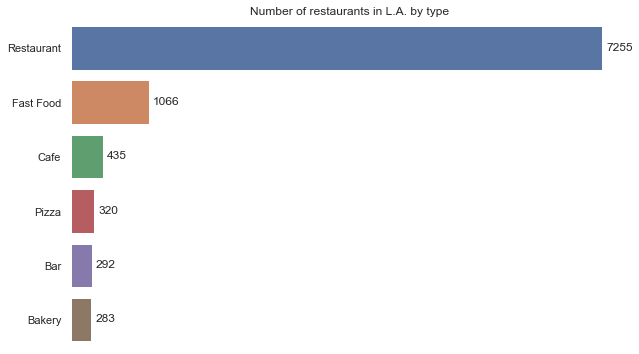

In [46]:
sns.set(style="white")
plt.rcParams['figure.figsize'] = (10, 6)


ax = sns.barplot(x = 'count', y = 'type', data = t_stats, order = t_stats['type'])

#annotating bars with count:
for bar in ax.patches:
    ax.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width(),
                    bar.get_y()), ha = 'left', va = 'top', size = 12, xytext = (4, -16),
                    textcoords = 'offset points')

    
#styling
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set(ylabel = None)
ax.set(xticklabels=[])
ax.set(xlabel = None)
ax.tick_params(bottom=False)
                
plt.title('Number of restaurants in L.A. by type')

#saving the figure for later use in a presentation
save_fig = plt.gcf()
save_fig.savefig('Type numbers.png')

plt.show()

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  
Well done for sorting
</div>

In my personal opinion, bakeries are underestimated and should be more popular! But I won't share that insight with the investors.

Let's see how that looks by proportions:

In [47]:
t_stats['percent'] = round(t_stats['percent'])

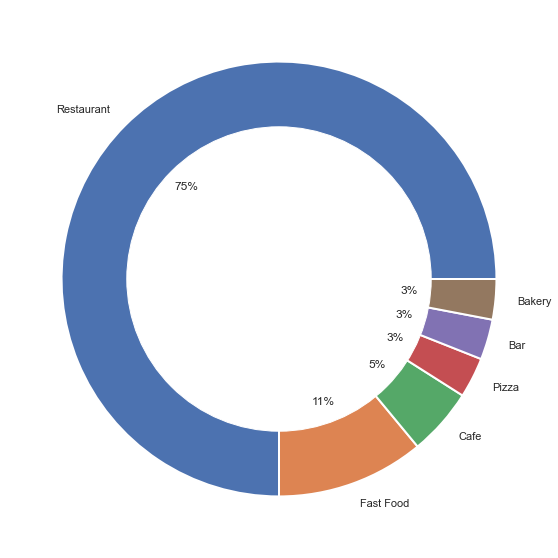

In [48]:
plt.rcParams['figure.figsize'] = (14, 10)

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
plt.pie(t_stats['percent'], labels = t_stats['type'], autopct='%.0f%%', wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)

save_fig = plt.gcf()
save_fig.savefig('Type proportion.png')
plt.show()

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  
Nice! Pie chart is very suitable for visualizing this type of data. It's great that you also signed percentages
</div>

### Investigate the proportions of chain and nonchain establishments. Plot a graph.

Let's demonstrate the total proportions for chain and nonchain restaurants:

In [49]:
data.stb.freq(['chain'])

,chain,count,percent,cumulative_count,cumulative_percent
0,False,5975,61.910683,5975,61.910683
1,True,3676,38.089317,9651,100.000000


In [50]:
chain_stats = data.stb.freq(['chain']).drop(columns = ['cumulative_count', 'cumulative_percent'])

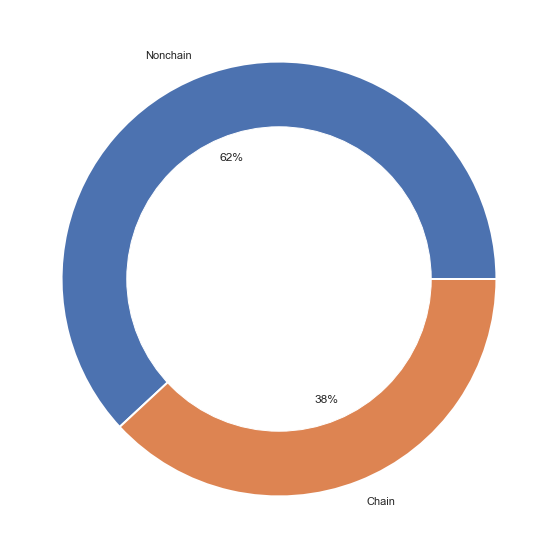

In [51]:
plt.rcParams['figure.figsize'] = (14, 10)

# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

plt.pie(chain_stats['percent'], labels = ['Nonchain', 'Chain'], autopct='%.0f%%', wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
p = plt.gcf()
p.gca().add_artist(my_circle)

save_fig = plt.gcf()
save_fig.savefig('Chain_total_p.png')
plt.show()

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  👍
</div>

The majority of establishments are nonchain! Corporations are yet to consume us all.

<div class="alert alert-info" style="box-shadow: 4px 4px 4px"> <b>Student comments:</b> 
Phew...still true ✊</div>

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>№2 ✔️</b>  Only the ratio of categories has changed a little) 
</div>

### Which type of establishment is typically a chain?

To answer this question, let's break down the chain proportions by type of establishment:

In [52]:
prop = pd.pivot_table(data = data, index = 'type', columns = 'chain', values = 'id', aggfunc = 'count', fill_value = 0).reset_index()

prop['total'] = prop[False] + prop[True]

prop['Nonchain'] = prop[False]/prop['total']
prop['Chain'] = prop[True]/prop['total']


In [53]:
prop

chain,type,False,True,total,Nonchain,Chain
0,Bakery,0,283,283,0.000000,1.000000
1,Bar,215,77,292,0.736301,0.263699
2,Cafe,169,266,435,0.388506,0.611494
3,Fast Food,461,605,1066,0.432458,0.567542
4,Pizza,167,153,320,0.521875,0.478125
5,Restaurant,4963,2292,7255,0.684080,0.315920


The logical way to display these values would be with a stacked bar chart:

In [54]:
prop_plot = prop.sort_values(by = 'Chain', ascending = False)

In [55]:
prop_plot[prop_plot['type'] == 'Bakery']['Chain']

0    1.0
Name: Chain, dtype: float64

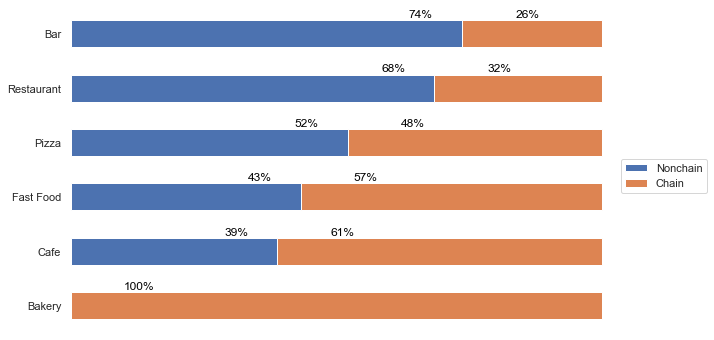

In [56]:
ax = prop_plot[['type', 'Nonchain', 'Chain']].plot(kind='barh', 
        stacked=True, 
        figsize=(10, 6), legend = ['Nonchain', 'Chain'])

#annotating bars with percentages:
# for bar in ax.patches:
#     ax.annotate(format(bar.get_width(), '.0%'),
#                    (bar.get_width(), bar.get_y())
#                    ,ha = 'left', va = 'baseline', size = 12, xytext = (0, 28),
#                     textcoords = 'offset points')

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 0.55))

style = dict(size=12, color='black')

# Annotating chain percentages:

ax.text(1.1 - prop_plot[prop_plot['type'] == 'Bakery']['Chain'], .3, "100%", **style)
ax.text(1.1 - (prop_plot[prop_plot['type'] == 'Cafe']['Chain']), 1.3, "61%", **style)
ax.text(1.1 - prop_plot[prop_plot['type'] == 'Fast Food']['Chain'], 2.3, "57%", **style)
ax.text(1.1 - prop_plot[prop_plot['type'] == 'Pizza']['Chain'], 3.3, "48%", **style)
ax.text(1.1 - prop_plot[prop_plot['type'] == 'Restaurant']['Chain'], 4.3, "32%", **style)
ax.text(1.1 - prop_plot[prop_plot['type'] == 'Bar']['Chain'], 5.3, "26%", **style)

# Annotating non-chain percentages:

ax.text(prop_plot[prop_plot['type'] == 'Cafe']['Nonchain'] - 0.1, 1.3, "39%", **style)
ax.text(prop_plot[prop_plot['type'] == 'Fast Food']['Nonchain'] - 0.1, 2.3, "43%", **style)
ax.text(prop_plot[prop_plot['type'] == 'Pizza']['Nonchain'] - 0.1, 3.3, "52%", **style)
ax.text(prop_plot[prop_plot['type'] == 'Restaurant']['Nonchain'] - 0.1, 4.3, "68%", **style)
ax.text(prop_plot[prop_plot['type'] == 'Bar']['Nonchain'] - 0.1, 5.3, "74%", **style)
    
#styling
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set(ylabel = None)
ax.set(yticklabels=prop_plot['type'])
ax.set(xticklabels=[])
ax.set(xlabel = None)
ax.tick_params(bottom=False)

# #saving the figure for later use in a presentation
save_fig = plt.gcf()
save_fig.savefig('Chain_p_by_type.png')

plt.show()

<div class="alert alert-info" style="box-shadow: 4px 4px 4px"> <b>Student comments:</b> 
Made som changes to the code as the patch functionality is really clunky when one has to annotate different things on the same bars...this is a bit less elegant, but it made me learn the text functionality at least 😅</div>

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>   It's great that you're looking at the ratio of chain establishments
</div>

On the graph we see data sorted by the proportion of non-chain establishments in descending order. As we can see, it's mostly cafes that happen to be chain establishments in L.A., ahead of Pizza and Fast Food places – the usual suspects (and they are unsurprisingly right behind cafes in terms of the proportion). Bars in L.A. are least likely to be part of a chain (only 1 in 4). Whereas if you walk around the city, on average you can expect almost 2 cafes out of 3 to be a chain establishment. 

UPD

Somewhat suprisingly, proportion of chain ownership appears to grow the smaller the type of establishment, as one usually imagines them, and the fewer the proportion they make up in terms of the total number of establishments in the city!

### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

To asnwer this question we can study the distribution of chain establishments the number of seats in a place. Let's start by slicing out the data on chains:

In [57]:
c_data = data[data['chain'] == True]

Now let's at how many seats each of them has:

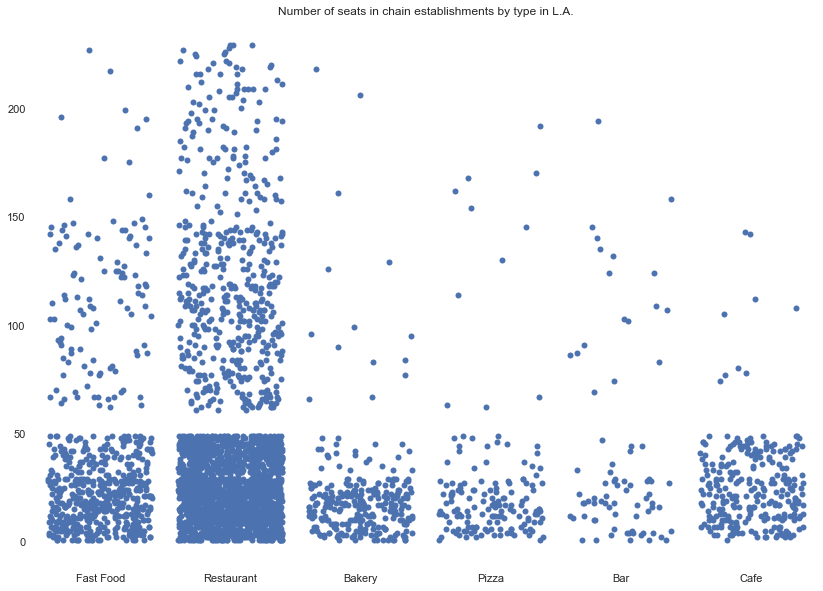

In [58]:
ax = sns.stripplot(x = 'type', y = 'seats', data = c_data, jitter = .4, size = 6, order = ['Fast Food', 'Restaurant', 'Bakery', 'Pizza', 'Bar', 'Cafe'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set(ylabel = None)
#ax.set(xticklabels=[])
ax.set(xlabel = None)
ax.tick_params(bottom=False)
                
plt.title('Number of seats in chain establishments by type in L.A.')

#saving the figure for later use in a presentation
save_fig = plt.gcf()
save_fig.savefig('Seats_per_c_by_type.png')

plt.show()

Interesting, we can clearly see how the majority of Fast Food and Restaurant chains pack neatly under 50 seats, almost as if it was some kind of a common cap for most of them, or a safety requirement that would break places into categories – unless you're big enough to house over 60 seats, don't put more than 50 seats. Most of the Pizza, Bar, Bakery and Cafe chains follow the same pattern, but of course, because there are more Fast Food and Restaurant places, we also see more outliers. However a cafe or a bar seems much less likely to be a massive place that would host over 50 seats, where such restaurants, even Fast Food ones, certainly exist especially in big cities (and L.A. is a big city). The bakeries are of course less likely to house more than 30 seats or so, because it's not the kind of place you choose to eat when you go out for a casual or family dinner.

UPD

We can actually say now that bars are definitely more likely to house over 50 seats and above than either pizza places or even cafes. Perhaps again this has to do with bars generally being more packed or flexible with space, thus being able to pack more seats to reap higher revenue.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b> Good points
</div>

We can also plot a distribution of value_counts to see if bigger or smaller chains are more common in general (in terms of the amount of places per chain).

In [59]:
c_n = c_data['name'].value_counts().reset_index()

In [60]:
c_n.columns = ['name', 'count']

In [61]:
c_n.head()

,name,count
0,COFFEE BEAN & TEA LEAF,50
1,SUBWAY,31
2,DOMINO'S PIZZA,15
3,KENTUCKY FRIED CHICKEN,14
4,WABA GRILL,14


Turning the category datatype from the previous table (that I'm going to use to add type to c_n) back into object just so it doesn't mess with grouping methods:

In [62]:
c_data['type'] = c_data['type'].astype('str')

/var/folders/1g/s3zdmnjx7gsfvmjbw229rc7w0000gn/T/ipykernel_30552/2060828896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_data['type'] = c_data['type'].astype('str')


In [63]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3676 entries, 8 to 9650
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3676 non-null   int64 
 1   name       3676 non-null   object
 2   address    3676 non-null   object
 3   chain      3676 non-null   bool  
 4   type       3676 non-null   object
 5   seats      3676 non-null   int64 
 6   new_chain  3676 non-null   bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 179.5+ KB


Now I will just group the previous table to get the types of places that I can add to c_n:

In [64]:
chain_data = c_data.groupby('name').agg({'type': 'max'}).reset_index()

In [65]:
chain_data = c_n.merge(chain_data, on = 'name', how = 'left')

And this is the table we need:

In [66]:
chain_data.head(10)

,name,count,type
0,COFFEE BEAN & TEA LEAF,50,Cafe
1,SUBWAY,31,Fast Food
2,DOMINO'S PIZZA,15,Pizza
3,KENTUCKY FRIED CHICKEN,14,Fast Food
4,WABA GRILL,14,Restaurant
5,TRIMANA,13,Restaurant
6,MCDONALD'S,13,Restaurant
7,STARBUCKS,12,Cafe
8,YOGURTLAND,12,Restaurant
9,PAPA JOHN'S PIZZA,12,Pizza


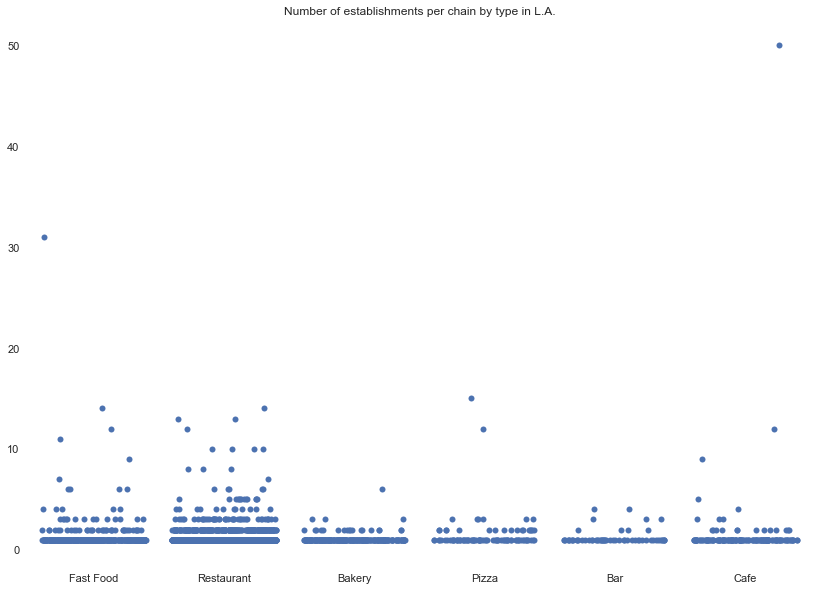

In [67]:
ax = sns.stripplot(x = 'type', y = 'count', data = chain_data, jitter = .4, size = 6,
                   order = ['Fast Food', 'Restaurant', 'Bakery', 'Pizza', 'Bar', 'Cafe'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set(ylabel = None)
#ax.set(xticklabels=[])
ax.set(xlabel = None)
ax.tick_params(bottom=False)
                
plt.title('Number of establishments per chain by type in L.A.')

#saving the figure for later use in a presentation
save_fig = plt.gcf()
save_fig.savefig('Chain_sizes_by_type.png')

plt.show()

This doesn't really answer our question in this section, but it's just a useful observation about the distribution of the sizes of chains in L.A. We can see how by far the majority of chains are actually under 5 establishments, and a chain over 5 places is rare, and it's extremely rare for a chain to have more than 10 places in L.A. (This is quite hard to believe so I'll just add: based on our data).

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b> 👍👍👍
</div>

Now let me do a final graph just to see if we can observe some kind of a visual relationship between the size of the chain itself (how many places it has) and how many seats the establishments house

In [68]:
extra_data = c_data.merge(chain_data[['name', 'count']], on = 'name', how = 'left')

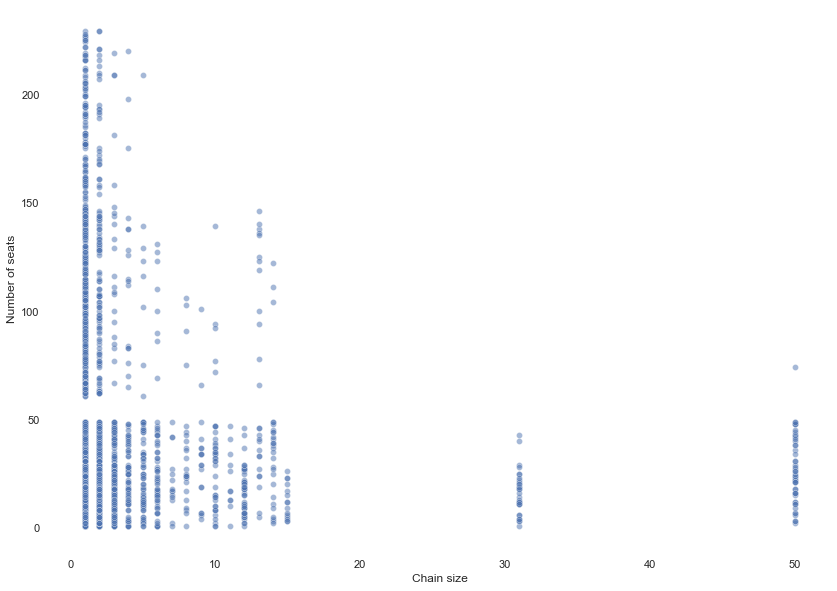

In [69]:
ax = sns.scatterplot(x = 'count', y = 'seats', data = extra_data, alpha = 0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set(ylabel = 'Number of seats')
#ax.set(xticklabels=[])
ax.set(xlabel = 'Chain size')
ax.tick_params(bottom=False)

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  This scatterplot is great for answering the task question as it shows dependence of two variables: the number of restaurants in the chain and the average number of seats👍
</div>

Just to complement our answer to the question "What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?", the graph above isn't the most readable, but we can observe that bigger chains tend to have fewer seats, it seems. But then, there aren't that many big chains. The least we can say is that huge number of sitting places happens more often in smaller chains. But as to the question – what is a typical chain – I'd say it's not a massive chain, most likely counting only a couple of places, with no more than 50 seats.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b> Well done!
</div>

### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

To asnwer this question, we plot both the average number overall as well as compare this value for Chain and Nonchain establishments. For our first plot, let's group the data by type:

In [70]:
avg_s_per_t = data.groupby('type').agg({'seats': 'mean'}).reset_index()

In [71]:
avg_s_per_t['seats'] = round(avg_s_per_t['seats'].astype(int))

In [72]:
avg_s_per_t = avg_s_per_t.sort_values(by = 'seats', ascending = False)

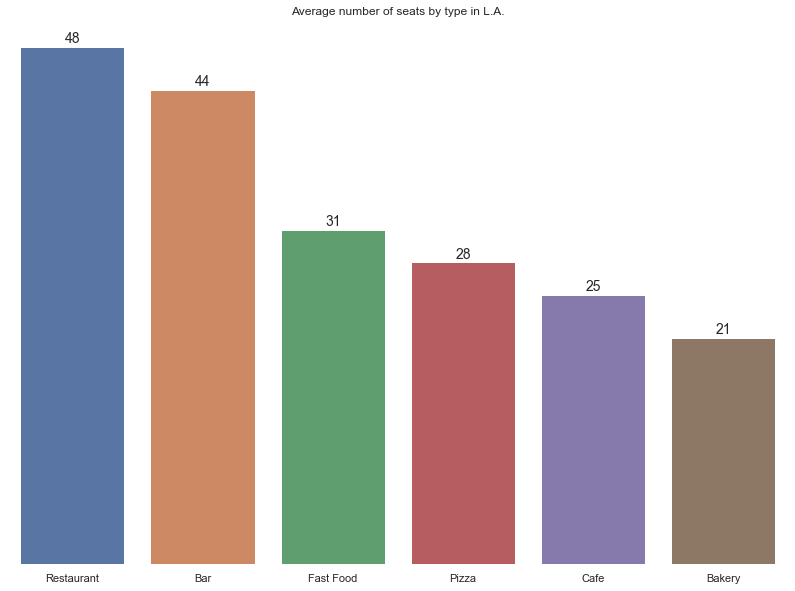

In [73]:
ax = sns.barplot(x = 'type', y = 'seats', data = avg_s_per_t, order = avg_s_per_t['type'])

#annotating bars with count:
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=14, xytext=(0, 8),
                   textcoords='offset points')
    
    

    
#styling
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set(ylabel = None)
# ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax.set(xlabel = None)
ax.tick_params(bottom=False)
                
plt.title('Average number of seats by type in L.A.')

#saving the figure for later use in a presentation
save_fig = plt.gcf()
save_fig.savefig('Avg seats per type.png')

plt.show()

This is quite interesting! I didn't know that bars would take the second place, as they usually come across as much smaller and somewhat cozier than restaurants. But I guess it's a) optical illusion because of the big tables in restaurants b) data for L.A. where demand for alcohol is second only to one other kind of toxic substance. But let's see if there's a difference for Chain and Nonchain establishments:

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b> Good point about bars) It looks like they really aren't as small as they seem
</div>

In [74]:
avg_s_per_t_by_c = data.groupby(['type', 'chain']).agg({'seats': 'mean'}).reset_index()

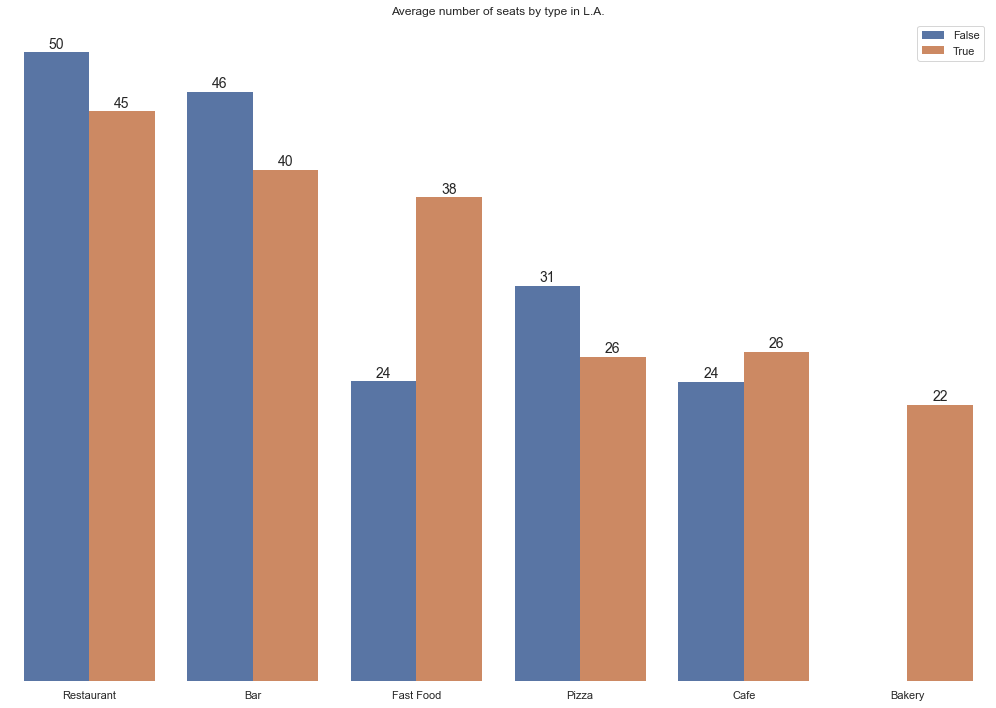

In [75]:
ax = sns.barplot(x = 'type', y = 'seats', data = avg_s_per_t_by_c, hue = 'chain',
                 order = ['Restaurant', 'Bar', 'Fast Food', 'Pizza', 'Cafe', 'Bakery'],  
                linewidth = 0)

#annotating bars with count:
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=14, xytext=(0, 8),
                   textcoords='offset points')
    
plt.legend(loc = 'upper right')

    
#styling
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set(ylabel = None)
# ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax.set(xlabel = None)
ax.tick_params(bottom=False)

plt.title('Average number of seats by type in L.A.')

#saving the figure for later use in a presentation
save_fig = plt.gcf()
save_fig.savefig('Avg seats per type.png')


plt.tight_layout()
plt.show()

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b> Wow, you really know how to create a cool graph
</div>


Interesting: chains tend to have less seats on average than nonchains, with Pizza places being the only exception. Perhaps Pizza Hut knows something other don't 🤔. It is not so true for cafes and bakeries, but the difference is quite pronounced with restaurants and bars. A possible reason for this discrepancy is the result of different business approaches: chains tend to be more pragmatic about allocating space or any other resource for that matter. For instance, instead of paying for more rental space to have extra seats that might stay empty too many hours per week to justify their presence on the books, the pragmatic franchise manager might prefer to 'squueze more out of less', that is, increase revenue per seat, if that's their KPI – in other words, they will try to make more revenue and minimize expenditure. A nonchain business might not care about it too much. 

UPD

Actually, we can see now that Fast Food chains, very sensibly, on average have 14 more seats than non-chains in the same segment. Perhaps because fast food chains usually already locate themselves at points with a very high customer turnover (like shopping malls, close to major transport hubs) they go ahead and pack more seats for those locations. And for large chains especially that of course part of an intense data-driven strategy these days, using geospatial data to find the optimal locations. In any case, non-chain fastfood restaurant are less likely to be as popular (since there is only 1 restaurant!) and be that large and placed somewhere where you better pack a lot of seats. 

We also see that cafe chains tend to have 1 more seat on average than non-chain cafes – in this case, I would say that the above argument about fast food chains probably applies to cafes at least to a degree. When chains grow (no matter the type), they will likely try to place their establishments at locations that they predict will have more customers, so in some cases it will make sense for them to have more seats in such places. But this also doesn't negate the other reasons as to why chain managers might be more pragmatic about seatcount in cases when business logic would suggest more seats are unnecessary or lead to more costs. In any case – for cafes the difference isn't so big between chain and non-chain, which means that there might room for growth.


<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
<b>⚠️</b> Perhaps some of the information was lost due to the replacement of the 'chain' column, but who knows) I really like what deep conclusions you make
</div>

<div class="alert alert-info" style="box-shadow: 4px 4px 4px"> <b>Student comments:</b> 
Indeed the proportions have changed! And yup, the results make total sense. Updated the comment above! </div>

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>№2✔️</b> You've got a very complete and detailed conclusion, great. Especially interesting about fast food. It looks like non-chain fast food is really not so popular and has fewer seats
</div>

But of course, it could also simply be that nonchain businesses happen to have more outliers in terms there being a massive restaurant in L.A. which is nonchain that skews the average seatcount. We can actually check that:

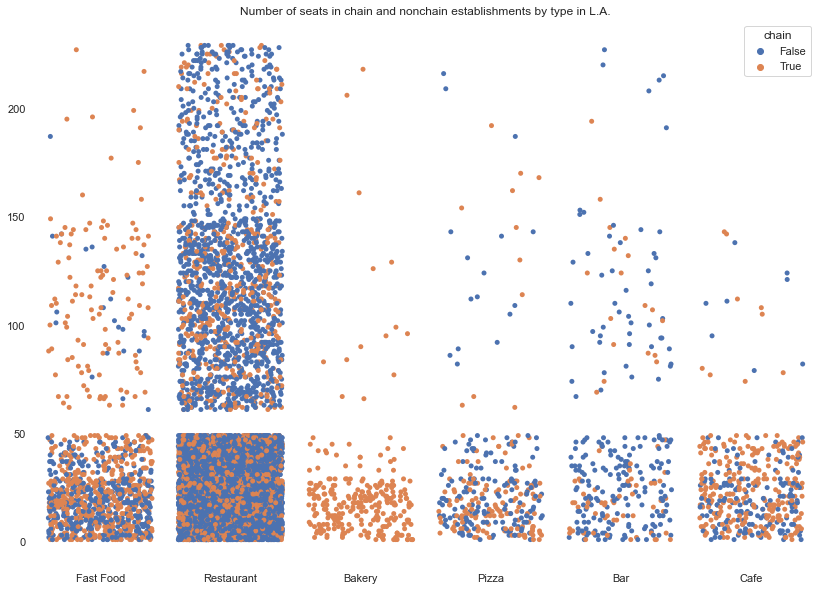

In [76]:
ax = sns.stripplot(x = 'type', y = 'seats', data = data, hue = 'chain', jitter = .4, order = ['Fast Food', 'Restaurant', 'Bakery', 'Pizza', 'Bar', 'Cafe'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set(ylabel = None)
#ax.set(xticklabels=[])
ax.set(xlabel = None)
ax.tick_params(bottom=False)
                
plt.title('Number of seats in chain and nonchain establishments by type in L.A.')

#saving the figure for later use in a presentation
save_fig = plt.gcf()
save_fig.savefig('Comparison_c_and_nc_seats.png')

plt.show()

There are certainly less chain establishments overall than chain ones. But for restaurants at least we can see that there quite a lot of large places in terms of seatcount for chain restauarants, but there are more such nonchain restaurants. Few bars in general are chain as opposed to being independent bars, and among independent bars there are about 7 that count between 150 and 250 seats. No chain bar in L.A. can boast of that. In fact, we can see that, with the exception of cafes, all of the largest establishments are nonchain.

UPD

We can see of course how Fast Food is the category where chains have the biggest restaurants, and that also applis to cafes although the differences between chain and non-chain in that case doens't look significant. Bakeries of course are all chain, so we might expect there to be a couple of some kind of large showcase restaurant like with fast food chains when you have a mammoth McDonalds next to a train station. 

### Put the data on street names from the address column in a separate column.

In [77]:
data.head()

,id,name,address,chain,type,seats,new_chain
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,False
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,False
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,False
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,False
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,False


I've decided that the best way to extract street names without the address parts or special symbols and letters would be to use regex. I used this reference (https://regex101.com/) to double check that it should work the way I intended, and in the order I needed to apply. 

***I realize this isn't very elegant, and I didn't really understand if it's possible to combine all of these steps into one Regex expression, so any feedback or tips would be very appreciated! 🙏***

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b> You can use <a href = "https://pypi.org/project/usaddress/">usaddress</a> library. A pretty good library for parsing addresses. Your code is also good) 
</div>


<div class="alert alert-info" style="box-shadow: 4px 4px 4px"> <b>Student comments:</b> 
Thank you! This looks awesome. For some reason I limited my search to 'pandas / cleaning text columns', should be more mindful of the vast ocean of libraries available for Python itself. I'll definitely check this out in the future! 😊 </div>

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b> 😊


In [78]:
data['street'] = data['address'].apply(lambda x: re.sub("#", "", x))
data['street'] = data['street'].apply(lambda x: re.sub("a*[0-9](?!a*[a-zA-Z])", "", x))
data['street'] = data['street'].apply(lambda x: re.sub("\A . ", "", x))
data['street'] = data['street'].apply(lambda x: re.sub("\A ", "", x))
data['street'] = data['street'].apply(lambda x: re.sub("\A. ", "", x))
data['street'] = data['street'].apply(lambda x: re.sub(" . \Z", "", x))
data['street'] = data['street'].apply(lambda x: re.sub(" \Z", "", x))
data['street'] = data['street'].apply(lambda x: re.sub(" .\Z", "", x))
data['street'] = data['street'].apply(lambda x: re.sub(" .\Z", "", x))
data['street'] = data['street'].apply(lambda x: re.sub(" \Z", "", x))

In [79]:
data.head()

,id,name,address,chain,type,seats,new_chain,street
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,False,EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9,False,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20,False,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,False,SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,False,ECHO PARK AVE


In [80]:
data['street'].sample(20)

6074              HOPE ST
9101    SANTA MONICA BLVD
6564          FIGUEROA ST
7889          MELROSE AVE
3350          MELROSE AVE
4736        WHITTIER BLVD
8267       MANCHESTER AVE
5532       LA TIJERA BLVD
8369          CENTRAL AVE
8436      SUNSET BLVD STE
8834         HIGHLAND AVE
1879      EXPOSITION BLVD
2772          VERMONT AVE
6544            PICO BLVD
9404         CENTURY BLVD
9285          FIGUEROA ST
201           SUNSET BLVD
5443            PICO BLVD
2068       LARCHMONT BLVD
8526          VERMONT AVE
Name: street, dtype: object

Seems to have worked!

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b> You've done a great job of parsing the street name. Let's now look at the streets with the largest number of restaurants
</div>



### Plot a graph of the top ten streets by number of restaurants.

Now that we have a column with street names, let's group our data by street and count up the restaurants:

In [81]:
r_by_s = data.groupby('street').agg({'id': 'count'}).reset_index().sort_values(by = 'id', ascending = False).head(10)

In [82]:
r_by_s

,street,id
819,SUNSET BLVD,358
706,PICO BLVD,340
919,WESTERN AVE,281
349,FIGUEROA ST,273
957,WILSHIRE BLVD,256
879,VERMONT AVE,245
675,OLYMPIC BLVD,226
17,3RD ST,220
471,HOLLYWOOD BLVD,211
753,SANTA MONICA BLVD,202


Sunset Blvd! Definitely heard about it in some 70s music...

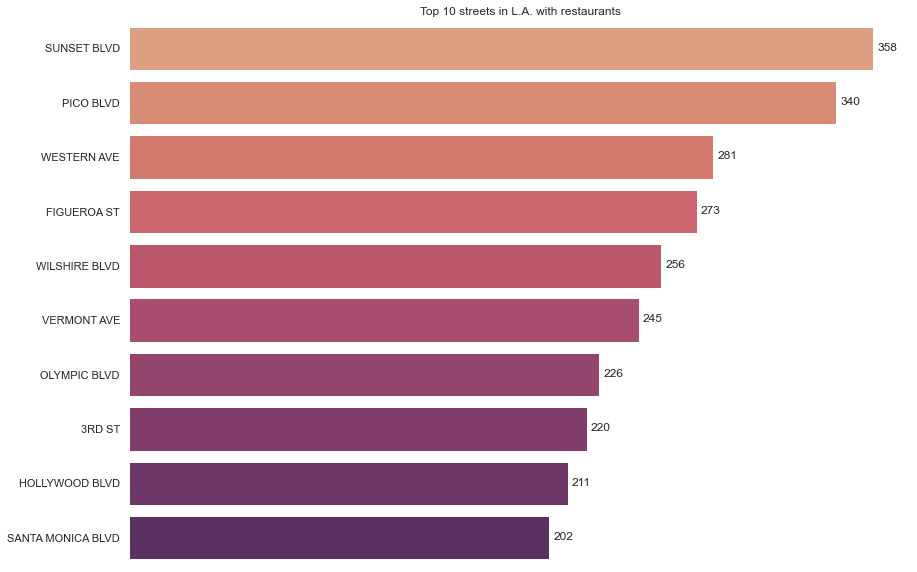

In [83]:
ax = sns.barplot(x = 'id', y = 'street', data = r_by_s, order = r_by_s['street'], palette = 'flare')

#annotating bars with count:
for bar in ax.patches:
    ax.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_width(),
                    bar.get_y()), ha = 'left', va = 'top', size = 12, xytext = (4, -16),
                    textcoords = 'offset points')

    
#styling
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set(ylabel = None)
ax.set(xticklabels=[])
ax.set(xlabel = None)
ax.tick_params(bottom=False)
                
plt.title('Top 10 streets in L.A. with restaurants')

#saving the figure for later use in a presentation
save_fig = plt.gcf()
save_fig.savefig('Top 10 streets.png')

plt.show()

Over 200 restaurants on one street is quite a feast. It'd be interesting to study L.A. food scene by cuisine!

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  A good choice of graph type.  it turned out very cool 🔥
</div>

### Find the number of streets that only have one restaurant.

Let's group our data by streets to find out:

In [84]:
streets_and_rests = data.groupby('street').agg({'id': 'count'}).reset_index()

In [85]:
len(streets_and_rests.query('id == 1'))

605

Well, that's more than half the streets! (Of the ones that have restaurants, to be precise).

In [86]:
len(streets_and_rests)

1030

We can plot the number of establishments per street for the 1030 streets in our dataset:

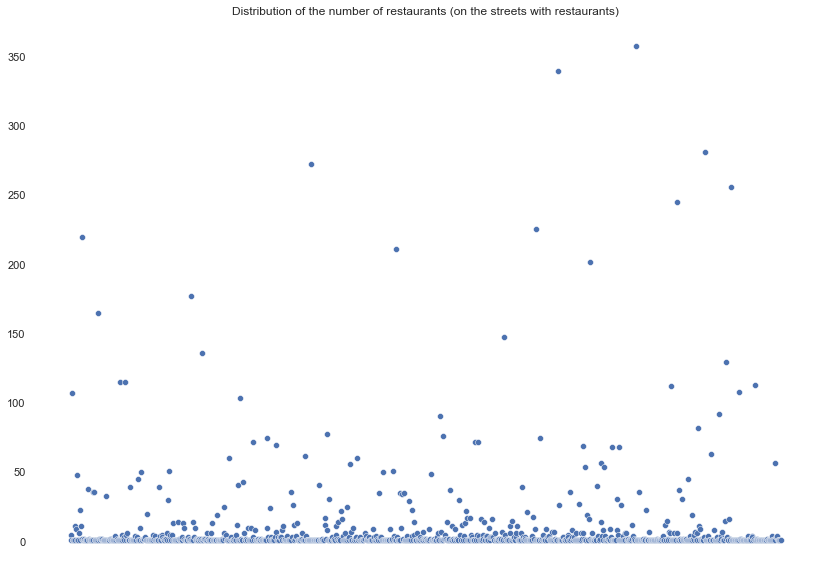

In [87]:
x_values = pd.Series(range(0, len(streets_and_rests)))

ax = sns.scatterplot(x = x_values, y = 'id', data = streets_and_rests)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set(ylabel = None)
ax.set(xticklabels=[])
ax.set(xlabel = None)
ax.tick_params(bottom=False)
                
plt.title('Distribution of the number of restaurants (on the streets with restaurants)')

plt.show()

Indeed it is clear that in terms of this distribution the insanely populous streets like Sunset Boulevard are outliers.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>  👍
</div>

### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

For this we can use our table from the previous task, which already has the top 10 streets full of restaurants:

In [88]:
r_by_s

,street,id
819,SUNSET BLVD,358
706,PICO BLVD,340
919,WESTERN AVE,281
349,FIGUEROA ST,273
957,WILSHIRE BLVD,256
879,VERMONT AVE,245
675,OLYMPIC BLVD,226
17,3RD ST,220
471,HOLLYWOOD BLVD,211
753,SANTA MONICA BLVD,202


And we can get the data we need – including the seats and everything – from the main table:

In [89]:
full_streets = data[data['street'].isin(list(r_by_s['street']))]

The following will show us the distribution of seatcounts across the (roughly) 2500 restaurants on the busiest streets in L.A.:

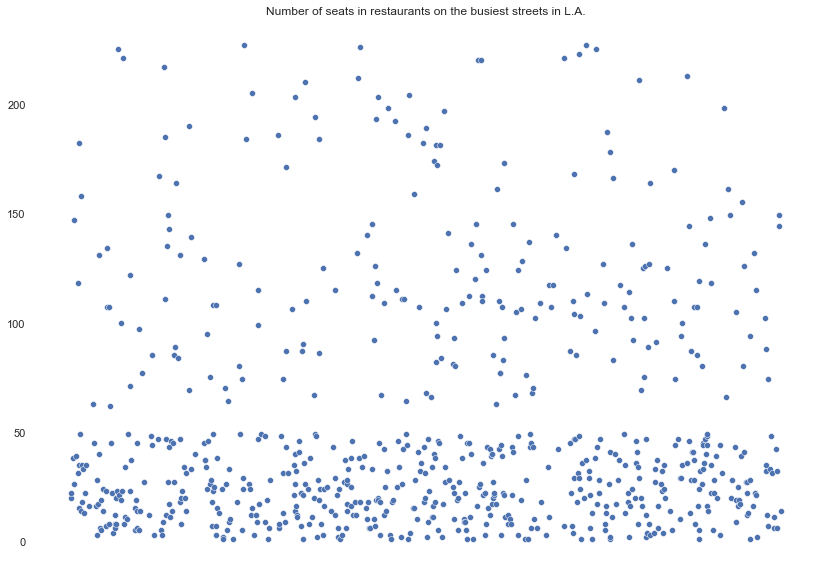

In [90]:
x_values = pd.Series(range(0, len(full_streets)))

ax = sns.scatterplot(x = x_values, y = 'seats', data = full_streets)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set(ylabel = None)
ax.set(xticklabels=[])
#ax.set(xlabel = None)
ax.tick_params(bottom=False)
                
plt.title('Number of seats in restaurants on the busiest streets in L.A.')

plt.show()

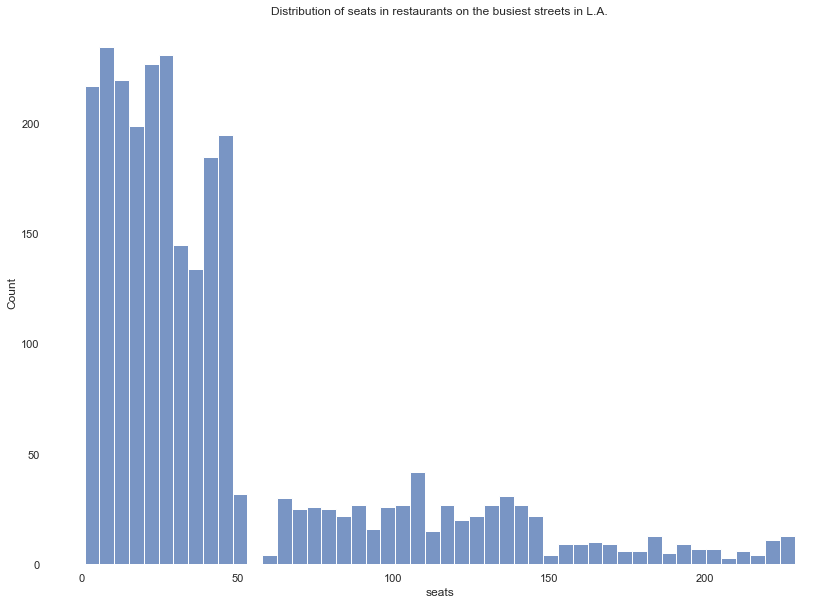

In [91]:
ax = sns.histplot(data = full_streets, x = full_streets['seats'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.set(ylabel = None)
#ax.set(xticklabels=[])
#ax.set(xlabel = None)
#ax.tick_params(bottom=False)
                
plt.title('Distribution of seats in restaurants on the busiest streets in L.A.')
plt.show()

<div class="alert alert-danger" style="box-shadow: 4px 4px 4px">
<b>❌</b> <s> I advise you to use a histogram: the answer to the question will not change from this, but it will be more clear </s>
</div>

<div class="alert alert-info" style="box-shadow: 4px 4px 4px"> <b>Student comments:</b> 
Agreed, this is indeed more clear-cut! </div>

UPD

It's hard to say exactly, but looks like there are quite a lot massive places located in the busiest streets, judging by the scatter graph. However when we put the data on a histogram, it's clear that the majority pack under 50 seats, regardles. But the distribution is far from normal, and place with anywhere between 60 and 150 seats are like a group of their own, and a significant portion of the business, obviously. The center of city's life attracts big crowds. We can compare this with the distribution on all the other streets:

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b>👍👍👍
</div>

In [92]:
empty_streets = data[~data['street'].isin(list(r_by_s['street']))]

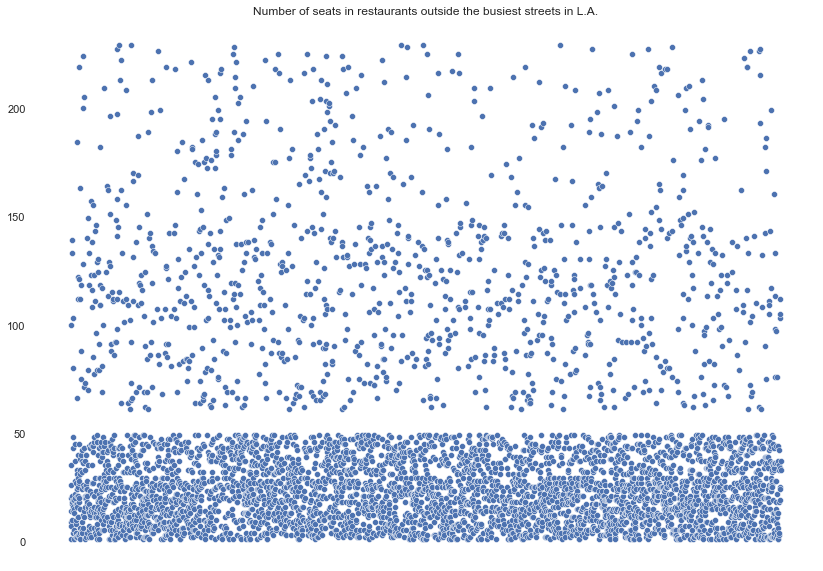

In [93]:
x_values = pd.Series(range(0, len(empty_streets)))

ax = sns.scatterplot(x = x_values, y = 'seats', data = empty_streets)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set(ylabel = None)
ax.set(xticklabels=[])
#ax.set(xlabel = None)
ax.tick_params(bottom=False)
                
plt.title('Number of seats in restaurants outside the busiest streets in L.A.')

plt.show()

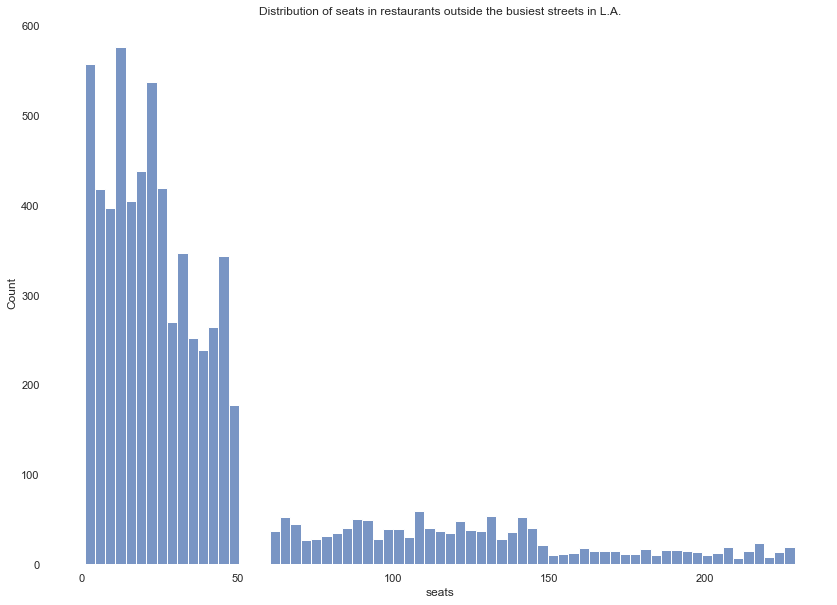

In [94]:
ax = sns.histplot(data = empty_streets, x = empty_streets['seats'])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.set(ylabel = None)
#ax.set(xticklabels=[])
#ax.set(xlabel = None)
#ax.tick_params(bottom=False)
                
plt.title('Distribution of seats in restaurants outside the busiest streets in L.A.')
plt.show()

Certainly looks like the other streets are packing a lot more of the smaller establishments. Let us just remember the significant difference in samples for these two graphs (2500 vs 7000 restaurants). And plot a single histogram for both of them to see the difference more clearly. 

To do that breakdown by types and compare the busiest streets against the rest, let's add a new column first:

In [95]:
topten = list(r_by_s['street'])

In [96]:
def assign_street(row):
    
    if row['street'] in topten:
        return 'top_ten'
    return 'other_streets'

data['street_category'] = data.apply(assign_street, axis = 1)

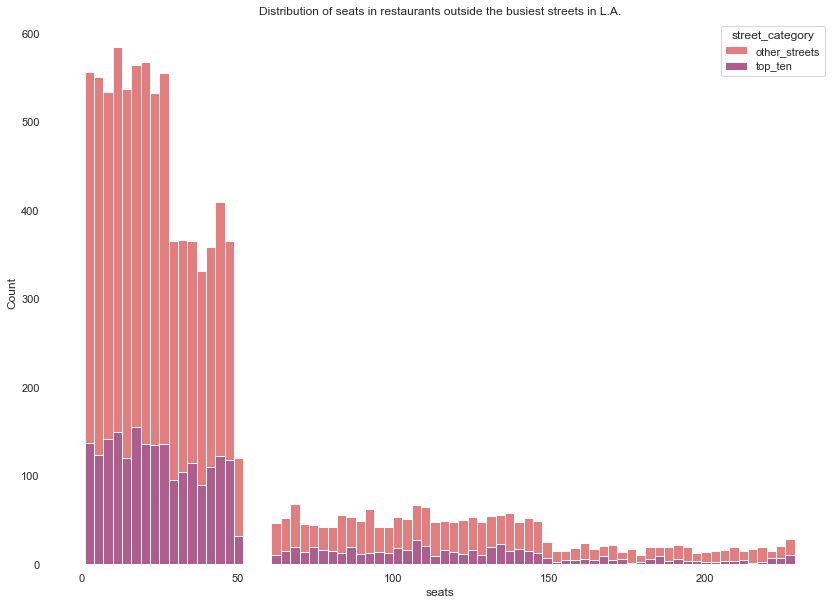

In [97]:
ax = sns.histplot(data = data, x = 'seats', palette="flare", alpha = 0.8, linewidth = 1, multiple = 'stack', hue = 'street_category')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.set(ylabel = None)
#ax.set(xticklabels=[])
#ax.set(xlabel = None)
#ax.tick_params(bottom=False)
                
plt.title('Distribution of seats in restaurants outside the busiest streets in L.A.')
plt.show()

It's a bit hard to tell because of the difference in numbers, so maybe a joint histogram isn't the best solution in this case. Let's break it down by types:

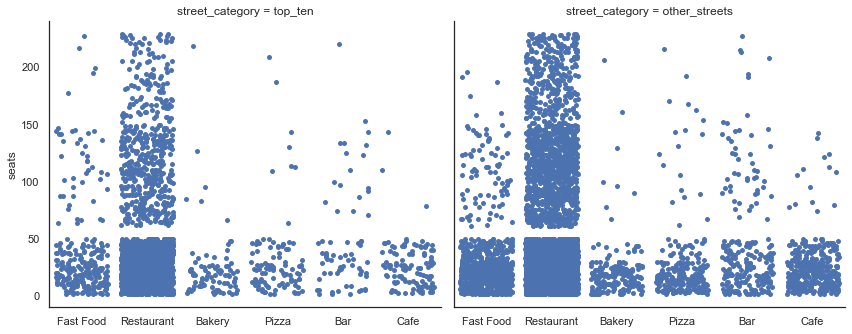

In [98]:
ax = sns.catplot(x = "type", y = "seats",
                 col="street_category", col_order = ['top_ten', 'other_streets'], 
                 data=data, jitter = .4, 
                 order = ['Fast Food', 'Restaurant', 'Bakery', 'Pizza', 'Bar', 'Cafe'],
                 height=5, aspect=1.2)

ax.set(xlabel = None)

plt.show()

I'd say it isn't very clear. Maybe we can track the boundaries more clearly with boxplots:

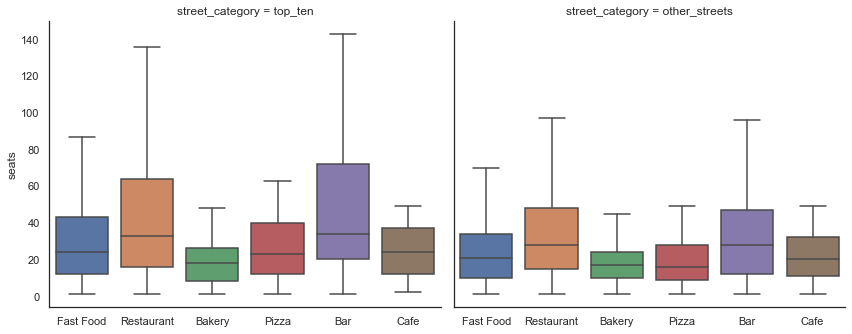

In [99]:
ax = sns.catplot(x="type", y="seats", col="street_category", col_order = ['top_ten', 'other_streets'],
                data=data, order = ['Fast Food', 'Restaurant', 'Bakery', 'Pizza', 'Bar', 'Cafe'],
                orient="v", height=5, aspect=1.2, showfliers = False,
                kind="box", dodge=True)

ax.set(xlabel = None)

plt.show()

Indeed if we control for outliers, we can see how the way the number of seats are distributed across bars in the busiest streets makes it much more likely to hit a larger bar. And the same is true for restaurants. You're more likely to find a massive restaurant or a bar with more than 100 seats if you're on one of those streets. Based on this comparison we can say that the busiest streets tend to house larger establishments with more seats. 

But let's compare them up close just so we can see the differences more clearly:

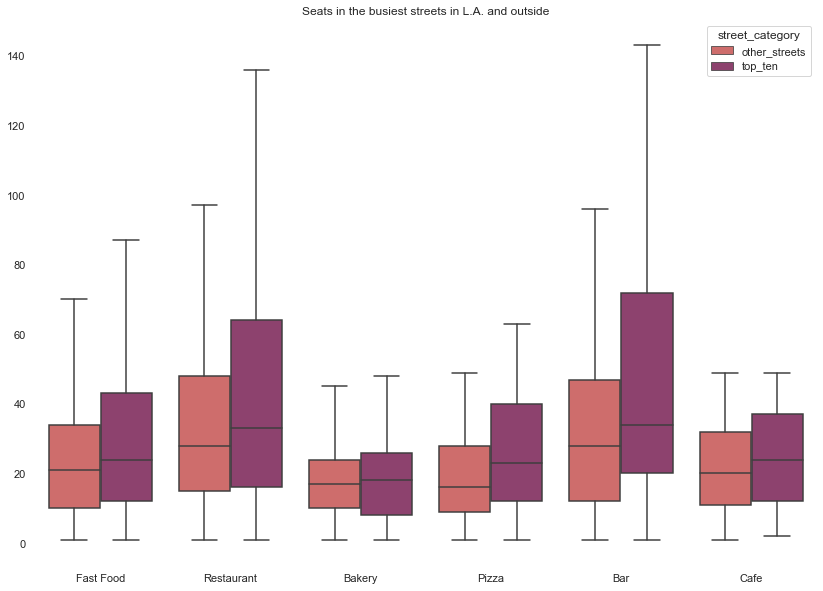

In [100]:
ax = sns.boxplot(x="type", y="seats", hue="street_category", hue_order = ['other_streets', 'top_ten'],
                data=data, order = ['Fast Food', 'Restaurant', 'Bakery', 'Pizza', 'Bar', 'Cafe'],
                orient="v", showfliers = False, dodge=True, palette = 'flare')

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set(xlabel = None)
ax.set(ylabel = None)

plt.title('Seats in the busiest streets in L.A. and outside')

#saving the figure for later use in a presentation
save_fig = plt.gcf()
save_fig.savefig('Seats in top ten and others.png')

plt.show()

Indeed now we can see that all types of establishments tend to house more seats on the busiest streets. It may come as counterintuitive: I remember my experience of stumbling into large sprawling cafes in European cities outside the city center, and they always seem larger – maybe partly because they are often much more empty than central places. Whereas the central spots are always packed and because of that one gets the illusion that there is less space. 

In fact, it looks like, at least in L.A., if you open a place on one of the busiest streets, you better pack as many seats as possible so ultimately you can sell more and increase the place's total revenue.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b> It seems that there are a lot more people on business streets and restaurant owners want as many of them as possible to come to eat at their restaurant. And due to the fact that the rent is quite expensive, it is necessary to compact the tables
</div>


Just a minor point to add to support the drive for robocafes in the 'top ten' market: its share is smaller there (as an establishment type) than overall and on other streets:

In [101]:
topten_stats = data.query('street_category == "top_ten"').stb.freq(['type']).drop(columns = ['cumulative_count', 'cumulative_percent'])

In [102]:
topten_stats.sort_values(by = 'percent', ascending = False)

,type,count,percent
0,Restaurant,2001,76.607963
1,Fast Food,249,9.532925
2,Cafe,110,4.211332
3,Pizza,99,3.790199
4,Bakery,86,3.292496
5,Bar,67,2.565084


In [103]:
other_streets_stats = data.query('street_category == "other_streets"').stb.freq(['type']).drop(columns = ['cumulative_count', 'cumulative_percent'])


In [104]:
other_streets_stats.sort_values(by = 'percent', ascending = False)

,type,count,percent
0,Restaurant,5254,74.641284
1,Fast Food,817,11.606762
2,Cafe,325,4.617133
3,Bar,225,3.196477
4,Pizza,221,3.139651
5,Bakery,197,2.798693


OK, maybe not by a lot... But half percent is still half percent. And if we go with the assumption that the current small share of cafes there is due to possible reasons outlined above and in the conclusion, then we can say there is a big market which is currently dominated by restaurants that are able to pack many seats on the busiest locations. We need to bring the robots there fast!

## Conclusion

We've seen that there are strong distinctions between restaurants, fast food places, bakeries, pizza places, bars and cafes. Restaurants are the largest group and they are also the second biggest non-chain format of business, with about 32% of establishments beloning to chains.

It appears different with cafes, which is our target format. This is the area of business where almost two thirds of establishments are already part of a chain. The biggest chain with over 50 establishments happens to be a coffee-serving cafe chain. 

Whereas we see that with restaurants it's easy to grow and build a place that will have over a 100 seats – both chain and non-chain businesses do that quite a lot, although chains are understandibly less flexible – with cafes we see the opposite. In fact, for almost every type of place we see that the biggest places are more often non-chain. But with cafes especially – they rarely go above 50 seats, and on average are 25 large.

Fast Foods and bakeries are an exception to that, with fast food chains presumably leveraging the benefits of being able to secure densely-visited locations, and trying to benefit from scale by increasing seatcount.

Our technology provides us with the opportunity to beat competition by reaping the benefits of higher seatcount (that brings higher revenue) without decreasing the quality and increasing operational costs because of more human staff. But cafe is also the right format for us – at least until we figure out a way to expand into other areas as efficiently – since its uncomplicated cuisine (compared to restaurants) is easy to scale to a large seatcount.

However, in order to reap the most benefits out of the whole deal, we should aim right for the busiest streets, since we don't want those extra seats to sit there empty, weighing on us with the added fixed costs. If we manage to break into the liveliest areas of the city, that won't be a problem: we can see that establishments of all types tend to be larger there for the reason that the demand is always present.

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b> You got a very good conclusion, great!I like that you make a very detailed conclusion, which is really interesting to read. The conclusion is a very important part of the study and it succeeded!
</div>

<div class="alert alert-info" style="box-shadow: 4px 4px 4px"> <b>Student comments:</b> 👌 Thanks again for reviewing my work Margarita, and for your kind words! I've included minor corrections in the conclusion to account for the changes in the calculations. </div>

<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
<b>✔️</b> Well done!
</div>